# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (corrected with f-string)
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City {city} not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san ignacio de velasco
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | kurumkan
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | ostersund
Processing Record 13 of Set 1 | el alto
Processing Record 14 of Set 1 | tazacorte
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | mil'kovo
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | gaoual
Processing Record 20 of Set 1 | york
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | pue

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san ignacio de velasco,-16.3667,-60.9500,37.42,29,50,6.57,BO,1729790271
1,lihue,21.9789,-159.3672,23.77,95,75,1.54,US,1729790271
2,port-aux-francais,-49.3500,70.2167,2.20,85,100,8.36,TF,1729790271
3,georgetown,5.4112,100.3354,27.96,83,20,1.03,MY,1729790271
4,codrington,-38.2667,141.9667,8.34,71,51,5.24,AU,1729790271


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san ignacio de velasco,-16.3667,-60.9500,37.42,29,50,6.57,BO,1729790271
1,lihue,21.9789,-159.3672,23.77,95,75,1.54,US,1729790271
2,port-aux-francais,-49.3500,70.2167,2.20,85,100,8.36,TF,1729790271
3,georgetown,5.4112,100.3354,27.96,83,20,1.03,MY,1729790271
4,codrington,-38.2667,141.9667,8.34,71,51,5.24,AU,1729790271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

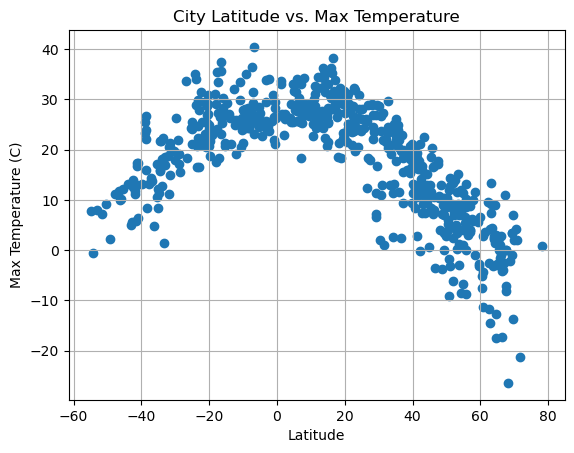

In [8]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Show the plot
plt.show()

#### Latitude Vs. Humidity

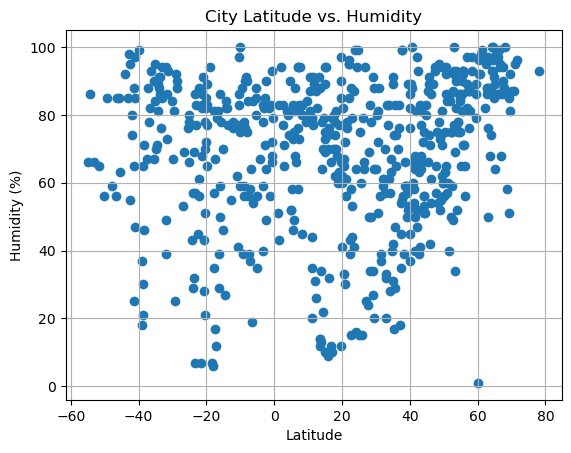

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

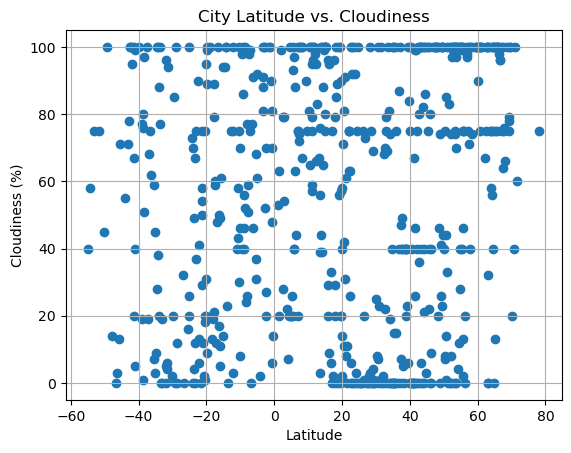

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

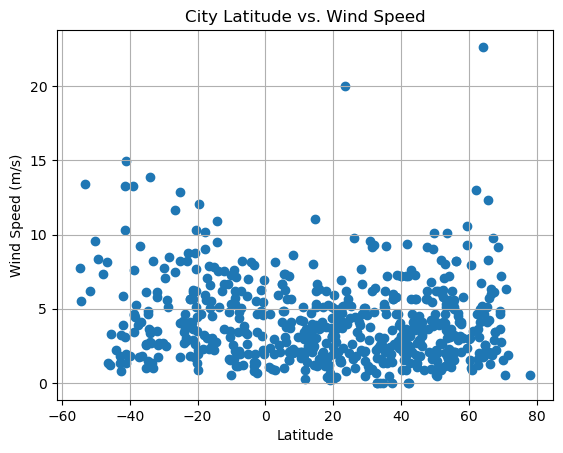

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lihue,21.9789,-159.3672,23.77,95,75,1.54,US,1729790271
3,georgetown,5.4112,100.3354,27.96,83,20,1.03,MY,1729790271
5,qaqortoq,60.7167,-46.0333,2.85,97,100,7.94,GL,1729790271
7,kurumkan,54.3000,110.3000,-8.57,78,4,1.84,RU,1729790272
11,ostersund,63.1792,14.6357,9.25,76,0,4.12,SE,1729790272


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san ignacio de velasco,-16.3667,-60.9500,37.42,29,50,6.57,BO,1729790271
2,port-aux-francais,-49.3500,70.2167,2.20,85,100,8.36,TF,1729790271
4,codrington,-38.2667,141.9667,8.34,71,51,5.24,AU,1729790271
6,blackmans bay,-43.0167,147.3167,5.07,85,71,1.79,AU,1729790271
8,edinburgh of the seven seas,-37.0676,-12.3116,13.67,78,68,9.24,SH,1729790272


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7533254339215041


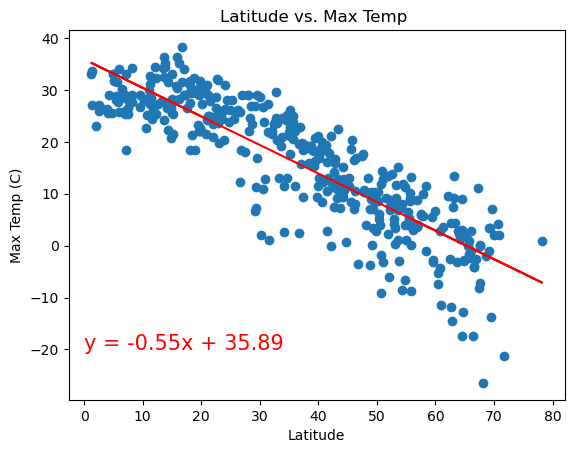

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title("Latitude vs. Max Temp ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.5485091877136622


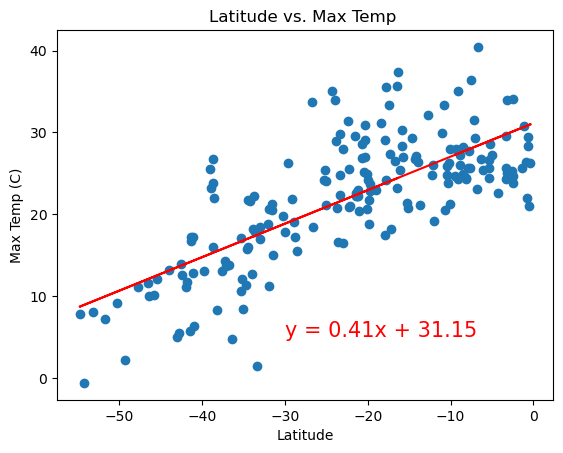

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title("Latitude vs. Max Temp ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There tends to be a negatative correlation between latitude and max temperature. As latitude moves away from the equator (0) temprature decreases. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.08833180328710363


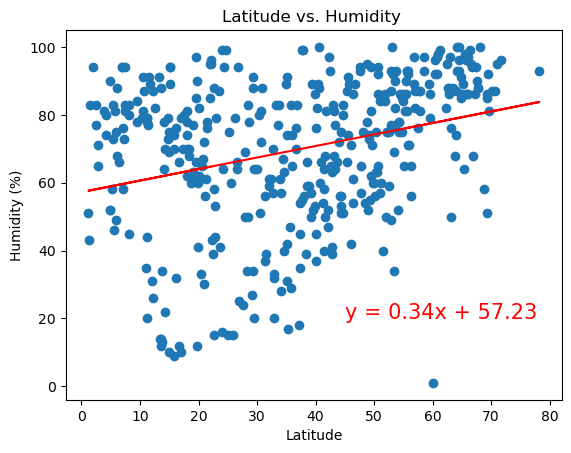

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.004943278521279903


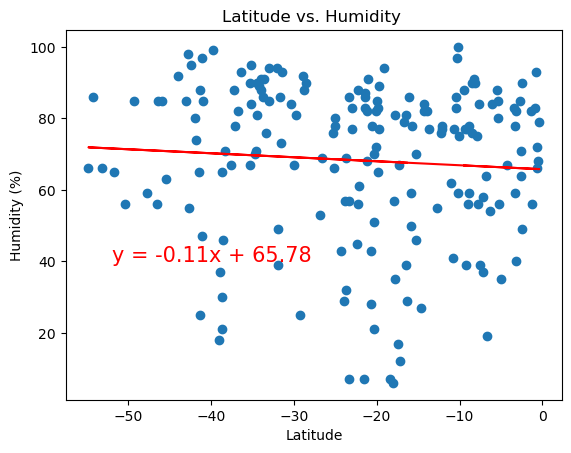

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.017593183264383656


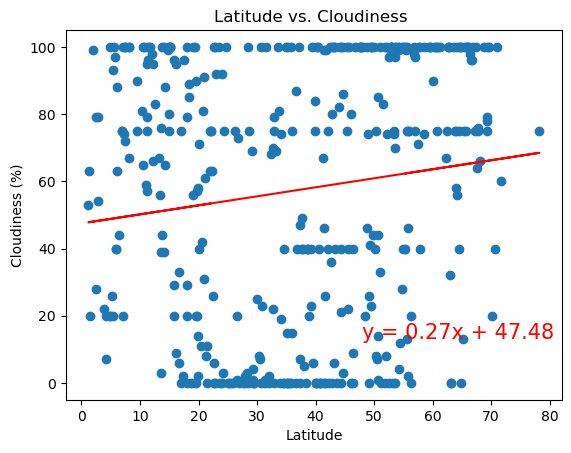

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.006705061721819785


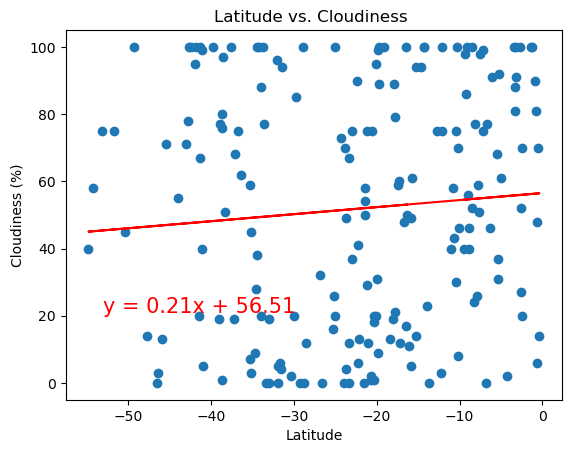

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,21),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Same as humidity, there is ver low to no correlation between latitude and cloudiness. There are more factors to consider. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01189886924881653


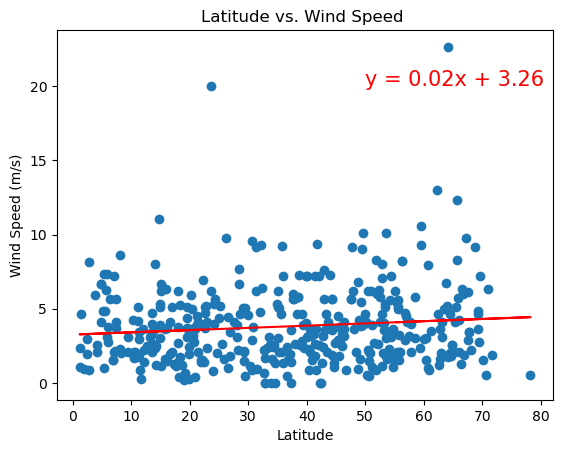

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Latitude vs. Wind Speed ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.02053821336618435


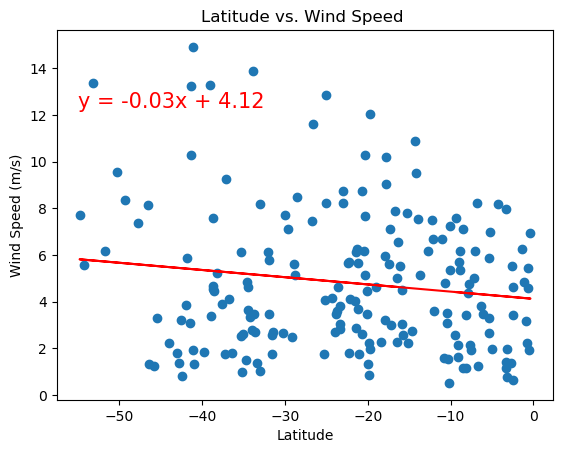

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,12.3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Latitude vs. Wind Speed ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

In [ ]:
#Discussion about the linear relationship:** Same as humidity, there is ver low to no correlation between latitude and cloudiness. There are more factors to consider. 